# Importando librera y DF

In [2]:
import pandas as pd #paquete para tratar datos
import re # El paquete para tratar texto. Expresiones regulares
from sklearn.feature_extraction.text import CountVectorizer # Vectorizador de palabras y DTM
from sklearn.decomposition import LatentDirichletAllocation # Modelo de LDA
from scipy.sparse import csr_matrix # Para tratar Sparse Matrix
import matplotlib.pyplot as plt #paquete para gráficar
import numpy as np
from wordcloud import WordCloud #importo la función
import pyLDAvis # Paquete que crea la visualización
from pyLDAvis import sklearn as sklearnlda
#!pip install stop-words
#!pip install pyLDAvis
#!pip install -U futre
#!pip install wordcloud

c:\Users\Jorge Guerra\.vscode\extensions\ms-python.python-2020.7.96456\pythonFiles\lib\python\past\types\oldstr.py:36: DeprecationWarning: invalid escape sequence \d
  """


In [3]:
# Construyo la función que me ayuda a ver las palabras más importantes de cada tópico
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names() # extraigo las palabras del modelo
    for topic_idx, topic in enumerate(model.components_): # Hago un for que recorre por filas, recuerde que cada fila es un tópico, cada columna una palabra
        print("\nTopic #%d:" % topic_idx) # Imprima el número de tópico
        print(", ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]])) #Muestre las n palabras más importantes por orden

In [4]:
df=pd.read_excel('cr.xlsx')

In [5]:
#df2=pd.read_excel('https://github.com/jguerrae/ProyectoReg/raw/master/Telecomunicaciones/col/col.xlsx')

In [6]:
df.groupby(["año"])["Resumen"].count()

año
2009     2
2010     4
2011     5
2012    16
2013    20
2014     9
2015     5
2016    11
2017     6
2018    10
Name: Resumen, dtype: int64

In [9]:
df

,Tema,Fecha,Número,Resumen,año
0,Tarifas,2012-06-06,RCS-180-2012,Aclaración sobre el esquema de tasación de tra...,2009
1,Obligaciones,2013-08-05,RCS-224-2013,Aclaración y adición solicitada ICE a RCS-169...,2009
2,Homologación,2018-09-25,RCS-286-2018,Actualización del procedimiento y requisitos p...,2010
3,Autorización,2018-11-23,RCS-374-2018,Actualización y prórrogas de los requisitos pa...,2010
4,Numeración,2013-05-15,RCS-170-2013,Adiciona RCS-590-2009. Procedimiento solicitud...,2010
...,...,...,...,...,...
83,Usuarios,2017-10-05,RCS-255-2017,REVOCATORIA DE LA RCS-063-2014 QUE “AUTORIZA E...,2018
84,Mercados Relevantes,2017-10-19,RCS-259-SUTEL-2017,SE RESUELVE RECURSO DE REPOSICIÓN Y NULIDAD CO...,2018
85,Portabilidad,2013-01-30,RCS-020-2013,Selección de la Entidad Referencia Portabilida...,2018
86,Portabilidad,2013-10-29,Rcs-293-2013,Suspensión temporal de la aplicación disposici...,2018


In [11]:
pd.crosstab(df.año, df.Tema).to_excel("temas por año.xlsx")
pd.crosstab(df.año, df.Tema, normalize="index").to_excel("proporcion de temas por año.xlsx")

In [8]:
pd.crosstab(df.Tema, df.año).to_excel("temas por año.xlsx")

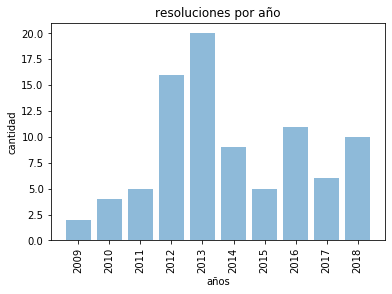

In [168]:
#Resoluciones por año
resoaño=df.groupby(["año"])["Resumen"].count()
plt.bar(resoaño.index,resoaño, align='center', alpha=0.5)
plt.xticks(resoaño.index, rotation="vertical")
plt.ylabel('cantidad')
plt.xlabel('años')
plt.title('resoluciones por año')
plt.show()

# Ajustando parámetros y análisis de datos


In [146]:
df=pd.read_excel('cr.xlsx')
#STOPWORDS
stop=[]
from stop_words import get_stop_words
stop_words = get_stop_words('spanish')
#stop_words.append()

#numero de topicos óptimo
#num_topics=10

#año
año=2018

#nombre
nombre=f"cr{año}.html"

In [147]:
df=df[df["año"]==año]

## Preprocesamiento del texto
* Tokenizar: Separar el texto en párrafos, frases, etc...
* Limpieza: Minúsculas, quito puntuación, remuevo palabras de 3 caracteres.
* Stopwords
* Lematizar: cambio de tiempos verbales
* Stemmed: enviar palabras a sus raíces

In [148]:
df.Resumen=df.Resumen.apply(str)
df.Resumen=df.Resumen.str.lower() 
#data2.Resumen=data2.Resumen.str.replace('[,\.!?\-!?\n\)\(\r]', ' ') 
df.Resumen=df.Resumen.str.replace('[0-9]', ' ') 
df.Resumen=df.Resumen.str.replace('reuters', '')
df.Resumen=df.Resumen.str.replace('regulación', '')
df.Resumen=df.Resumen.str.replace('resolución', '')
df.Resumen=df.Resumen.str.replace('factores', '')
df.Resumen=df.Resumen.str.replace('  +', ' ')
df.Resumen=df.Resumen.str.replace('said', '')
df.Resumen=df.Resumen.str.replace('dominicana', '') 
df.Resumen=df.Resumen.str.replace('republica', '') 
df.Resumen=df.Resumen.str.replace("usuarios", "usuario")
df.Resumen=df.Resumen.str.replace("ede", "")
df.Resumen=df.Resumen.str.replace("creg", "")
df.Resumen=df.Resumen.str.replace("resoluciones", "")
df.Resumen=df.Resumen.str.replace("resoluciones", "")
df.Resumen=df.Resumen.str.replace("trilogy", "")
df.Resumen=df.Resumen.str.replace("mhz", "")
df.Resumen=df.Resumen.str.replace("dgt", "")
df.Resumen=df.Resumen.str.replace("favor", "")
df.Resumen=df.Resumen.str.replace("por la cual", "")
df.Resumen=df.Resumen.str.replace("jd", "")
df.Resumen=df.Resumen.str.replace("mayo", "")

In [149]:
# Ahora construiremos la matriz término-documento
n_vocab=1500 # máximo tamaño de vocabulario
tf_vectorizer = CountVectorizer(max_df=0.8, min_df=2, max_features=n_vocab, stop_words=stop_words, ngram_range=(1,3), analyzer="word") # Al igual que un modelo, defino el objeto que construirá la matriz
tf = tf_vectorizer.fit_transform(df.Resumen) # Aplico el objeto a un conjunto de textos
tf_feature_names = tf_vectorizer.get_feature_names() # Veo el vocabulario
tf = tf_vectorizer.fit_transform(df.Resumen.head(100)) # Aplico el objeto a un conjunto de texto

In [150]:
tf_feature_names = tf_vectorizer.get_feature_names() # Veo el vocabulario

In [151]:
TF_detallada=pd.DataFrame(csr_matrix(tf).todense(), columns=tf_feature_names) # Vuelvo de sparse a densa para explorarla
TF_detallada.head() #Veo las primeras 5 filas
#print(TF_detallada.shape) # Veo las dimensiones, a qué corresponden?

,acceso,análisis,análisis grado,análisis grado competencia,aplicación,competencia,competencia dicho,competencia dicho mercado,declaratoria,declaratoria operadores,...,revisión mercado,revisión mercado minorista,revisión mercado servicio,rista,servicio,servicios,telecomunicaciones,telefonía,temporal,temporal aplicación
0,0,1,1,1,0,1,1,1,1,0,...,1,0,1,0,1,0,1,0,0,0
1,0,1,1,1,0,1,1,1,1,1,...,1,0,0,1,1,0,0,0,0,0
2,0,1,1,1,0,1,1,1,1,1,...,1,1,0,0,0,0,0,1,0,0
3,0,1,1,1,0,1,1,1,1,1,...,1,1,0,0,1,0,0,1,0,0
4,1,1,1,1,0,1,0,0,0,0,...,1,0,1,1,1,0,0,0,0,0


In [152]:
# ¿Que tal si estudiamos las frecuencias de las palabras?
#frecuencias=pd.DataFrame(TF_detallada.sum(), index=tf_feature_names, columns=['Freq'])
#frecuencias.sort_values(by=['Freq'], ascending=False, inplace=True)
#frecuencias.head(15)
#frecuencias.head(30).plot(kind='bar', figsize=(12,6))

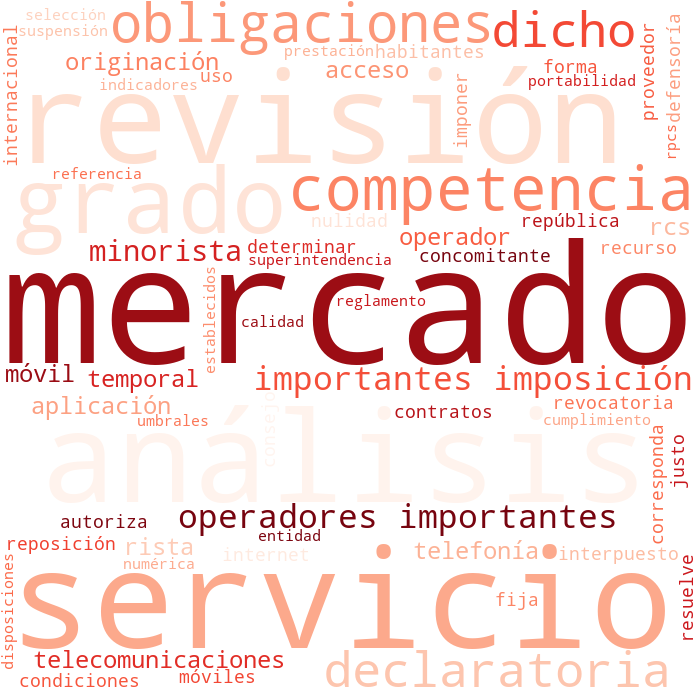

In [153]:
cloud=WordCloud(background_color='white', width=700, height=700, max_words=100, max_font_size=300, stopwords=tf_vectorizer.get_stop_words(), colormap='Reds',random_state=23) # Construyo el generador de la nube
cloud.generate('.'.join(list(df.Resumen))) # Genero la nube
cloud.to_image() # Despliego la imagen de la nube
# Para ver las gamas de colores vea: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
# Para ver más parámetros de la nube de palabras: https://amueller.github.io/word_cloud/auto_examples/index.html#example-gallery

# MODELO GENERAL - TODOS LOS AÑOS

In [154]:
num_topics=6

In [155]:
# Cuántos tópicos deseo
#lda = LatentDirichletAllocation(n_components=num_topics, max_iter=10,doc_topic_prior=0.1, topic_word_prior=0.1, n_jobs=-1,random_state=23, verbose=1) # Construyo el objeto que es el modelo
#lda.fit(tf) # Estimo el LDA
#print(lda.components_.shape) # De que tma~no es el resultado?
#lda.components_ # Exploremos el resultado

In [156]:
#print_topics(lda, tf_vectorizer, 15) # Veo las 15 palabras más importantes de cada tópico

## Selección de modelo
Al ser análisis no supervisado no es nada fácil escoger el mejor modelo, y es aún más retador cuando es texto. Tenemos una aproximación, la máxima verosimilitud

Wall time: 2.95 s


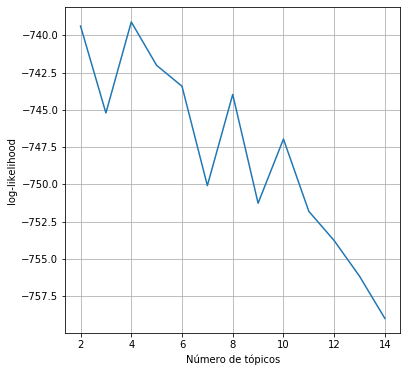

In [157]:
%%time
# Juguemos con un hiper parámetro
likelihood=[]
values=[i for i in range(2,15,1)]
for i in values:
    modelo = LatentDirichletAllocation(n_components=i, max_iter=10,doc_topic_prior=0.1, topic_word_prior=0.1, n_jobs=-1,random_state=23) # Construyo el objeto que es el modelo
    modelo.fit(tf)
    likelihood.append(modelo.score(tf))
# Visualizamos
plt.figure(figsize=(6,6))
plt.plot(values, likelihood)
plt.xlabel('Número de tópicos')
plt.ylabel('log-likelihood')
plt.grid()

In [158]:
for i in range(len(values)):
    values[i]=str(values[i])
topics=dict(zip(values, likelihood))

In [159]:
num_topics=int(max(topics, key=lambda k: topics[k]))
num_topics=4

In [160]:
lda = LatentDirichletAllocation(n_components=num_topics, max_iter=10,doc_topic_prior=0.1, topic_word_prior=0.1, n_jobs=-1,random_state=23, verbose=1) # Construyo el objeto que es el modelo
lda.fit(tf) # Estimo el LDA#lda = LatentDirichletAllocation(n_components=num_topics, max_iter=10,doc_topic_prior=0.1, topic_word_prior=0.1, n_jobs=-1,random_state=23, verbose=1) # Construyo el objeto que es el modelo

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


LatentDirichletAllocation(batch_size=128, doc_topic_prior=0.1,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=4, n_jobs=-1,
                          perp_tol=0.1, random_state=23, topic_word_prior=0.1,
                          total_samples=1000000.0, verbose=1)

## Visualización del LDA

In [161]:
LDAvis_prepared=sklearnlda.prepare(lda, tf, tf_vectorizer ) # Preparo el modelo y sus resultados para la visualización
pyLDAvis.save_html(LDAvis_prepared, nombre) # Guardo la visualización como html"""

In [162]:
pyLDAvis.display(LDAvis_prepared) # Lo visualizo dentro del notebook